In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

from tensorflow import keras



## load data

In [33]:
data_dir = "./data/"
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir, image_size=(360, 240), batch_size=64
)

for data, labels in dataset.take(1):
    print(data.shape)
    print(labels.shape)

Found 12 files belonging to 2 classes.
Found 0 files belonging to 0 classes.


ValueError: No images found in directory ./data/train/. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [25]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()
dataset.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [26]:
latent_dim = 28

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [27]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [28]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

ValueError: `y` argument is not supported when using dataset as input.

In [ ]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

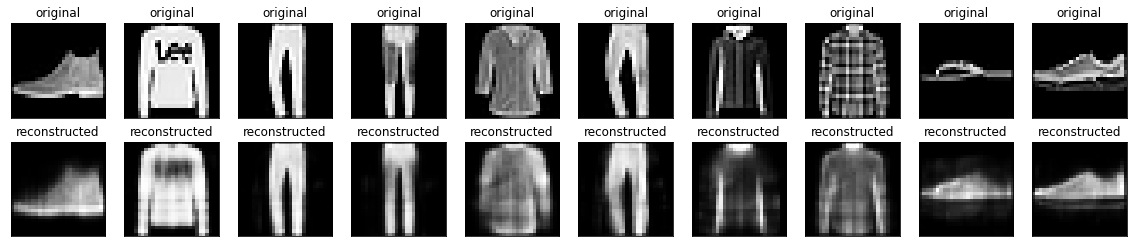

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

23.578505
[4.496592   2.444259   7.2450895  0.9697224  4.9384146  4.1061087
 1.9133561  1.7594063  7.862455   0.97309136 4.9541645  9.254676
 4.6940813  2.7223728  3.2880177  6.525515   0.         3.9228044
 4.7503424  4.946648   2.1831872  0.80391604 1.2066882  1.6700976
 1.3596494  4.2224503  4.3658767  0.        ]
[10.63890076  7.92063999  7.24508953  2.81295824 22.09881401  7.18431425
  4.00686312 -8.18638039 16.96657753  2.74443388  6.85442019  8.09092712
  9.78852558 11.97938347  4.94950867  7.17810631  0.          2.56532884
  2.31401515  0.13235861  7.80259514 -3.11606979  0.66141295 -0.61994886
  4.06272268  1.90327501 -2.20062733  0.05035925]


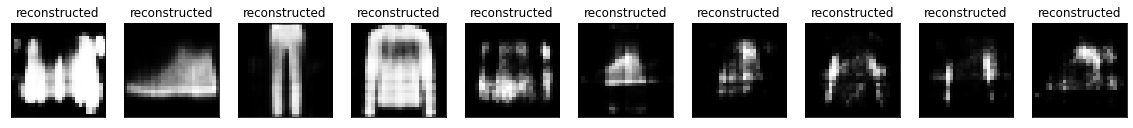

In [ ]:
print(np.max(encoded_imgs))
print(encoded_imgs[0])

arr = np.random.rand(10,28)*10
arr[0] = encoded_imgs[0] - encoded_imgs[3] +encoded_imgs[1]
arr[1] = encoded_imgs[0]
arr[2] = encoded_imgs[3]
arr[3] = encoded_imgs[1]
print(arr[0])

my_stupidity = autoencoder.decoder(arr).numpy()


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(my_stupidity[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()